## ***Predicting students dropout, academic success by using Machine Learning Algoritm***

# Introduction
This dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# data loading

In [2]:
df = pd.read_csv('dataset.csv')
#view the data
df.head(20)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
df.shape

(4424, 35)

The data frame contains 4,424 rows and 35 columns.

# finding null

In [4]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

# finding duplicates

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# Statistical Summary

In [7]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# histogram - visual representation

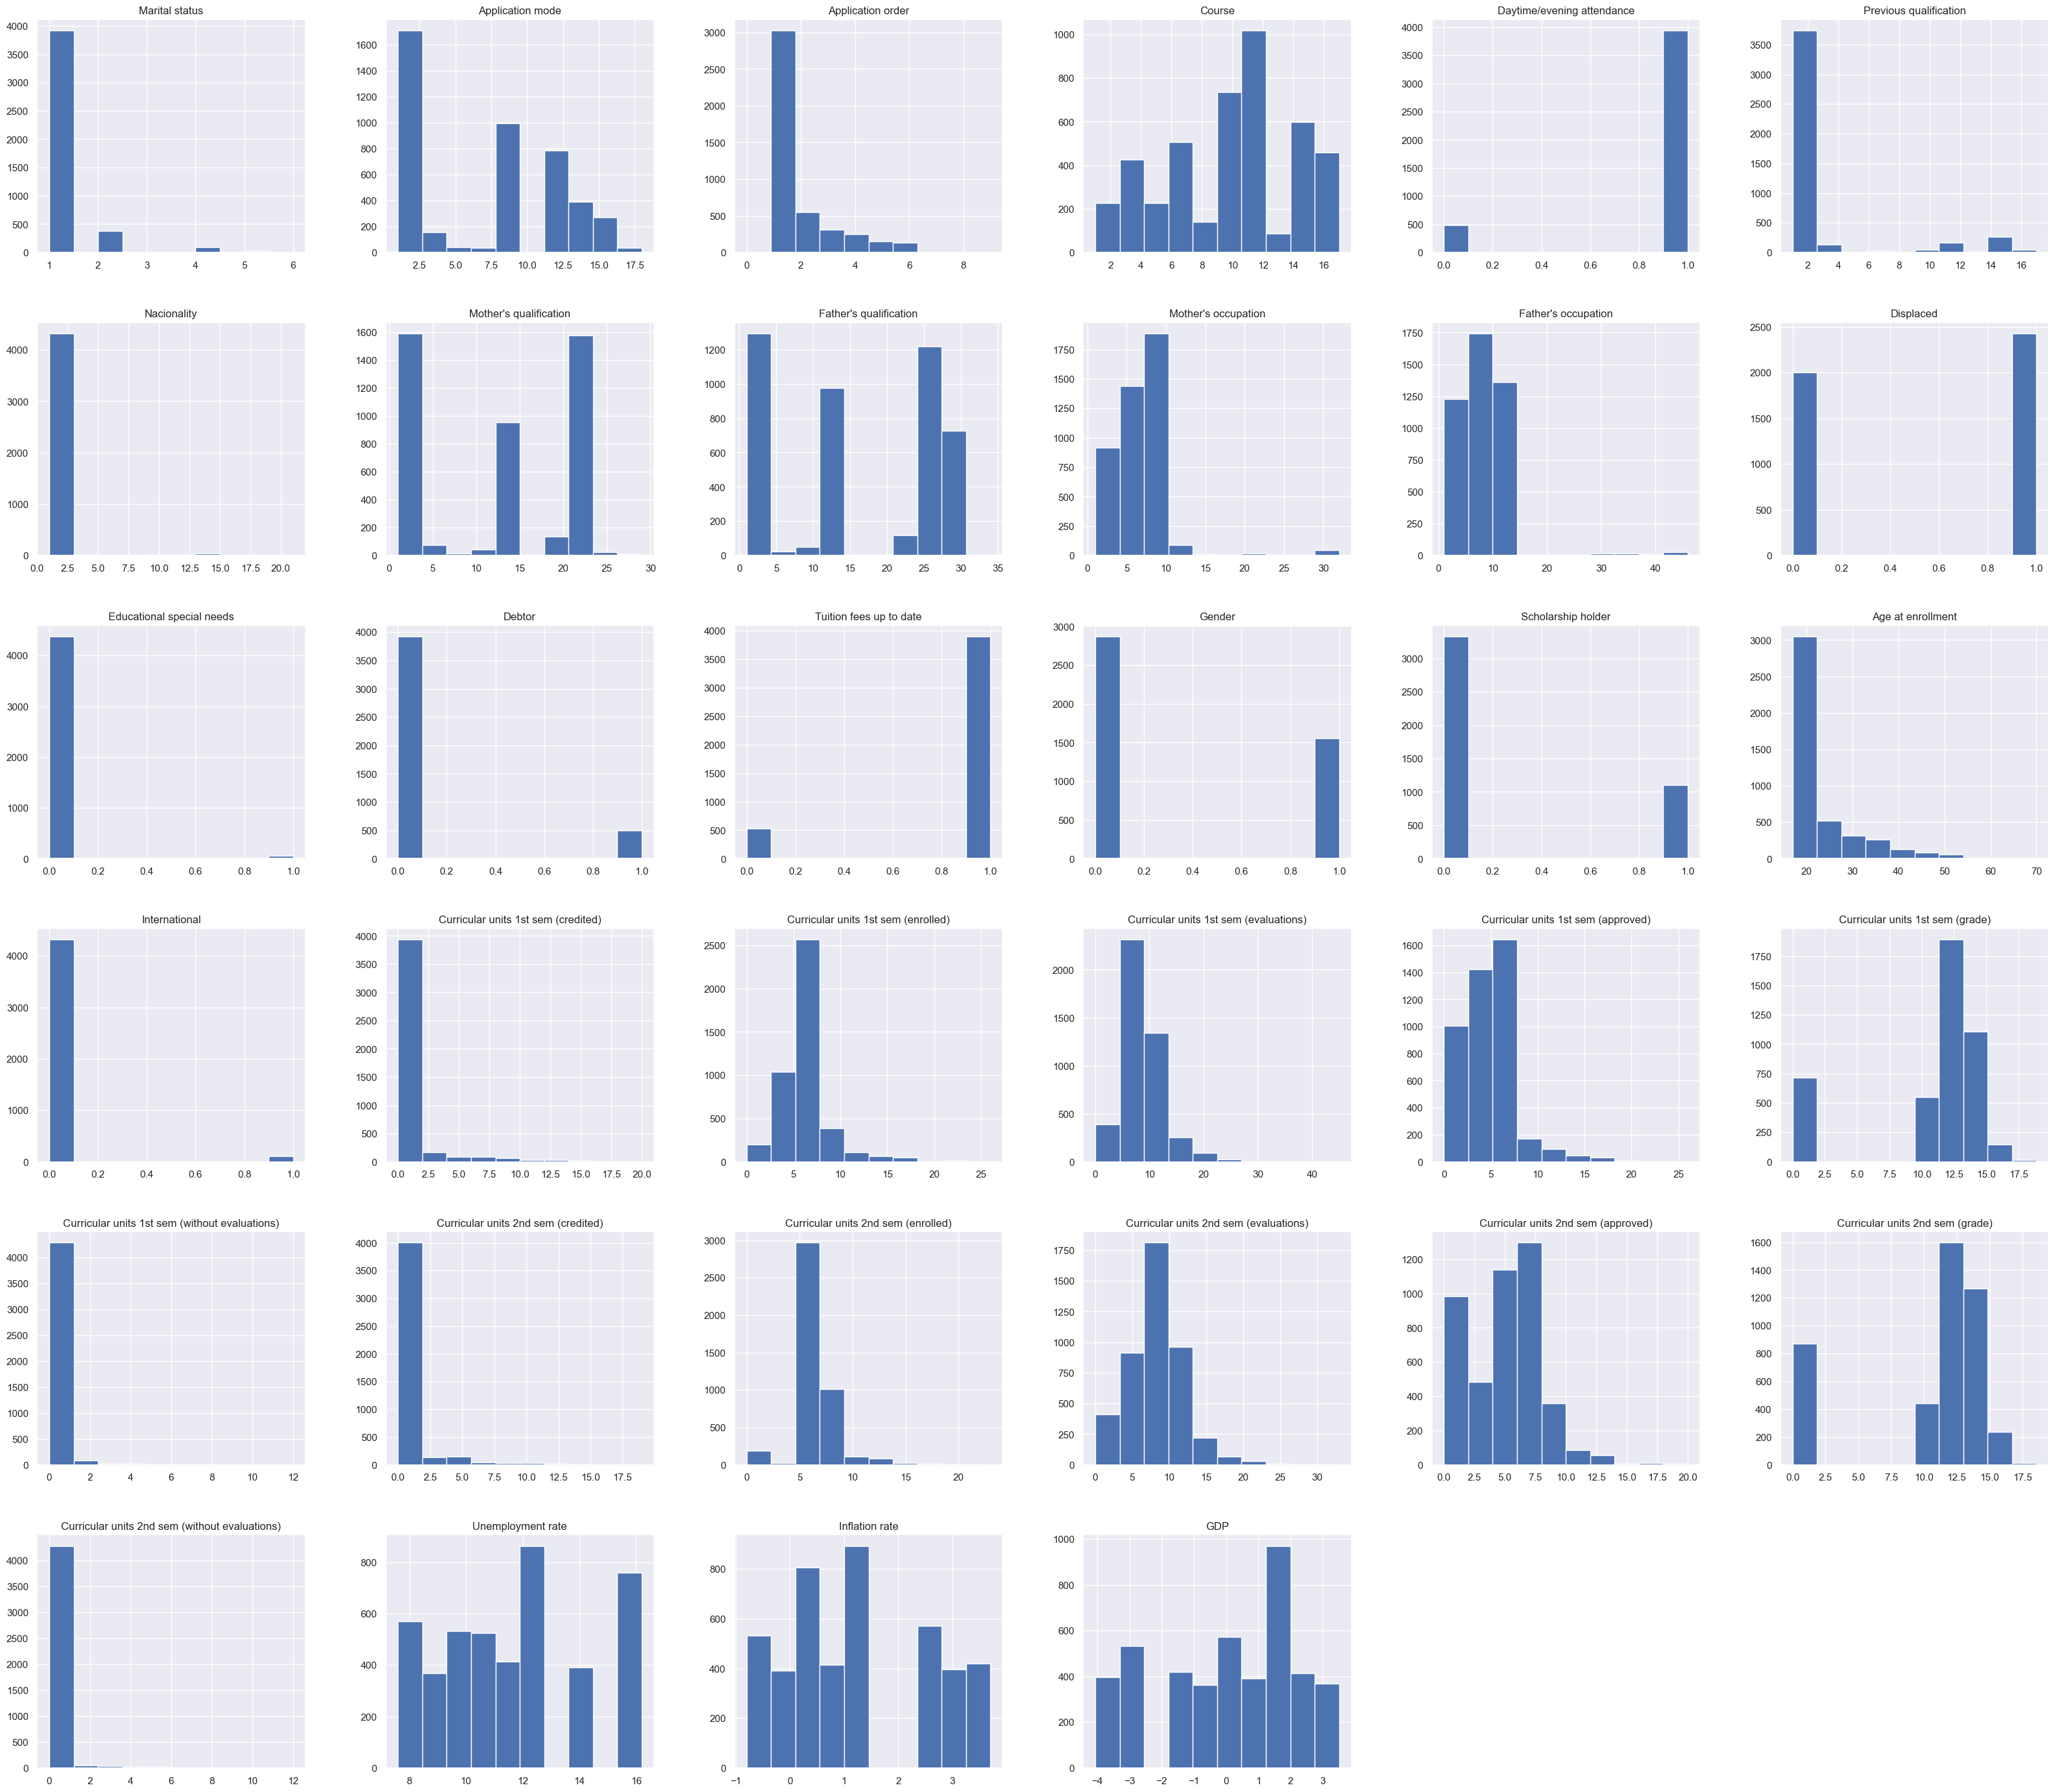

In [8]:
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(40, 35), grid=True, legend=None);

In [9]:
df.describe(include='all').loc['unique', :]

Marital status                                    NaN
Application mode                                  NaN
Application order                                 NaN
Course                                            NaN
Daytime/evening attendance                        NaN
Previous qualification                            NaN
Nacionality                                       NaN
Mother's qualification                            NaN
Father's qualification                            NaN
Mother's occupation                               NaN
Father's occupation                               NaN
Displaced                                         NaN
Educational special needs                         NaN
Debtor                                            NaN
Tuition fees up to date                           NaN
Gender                                            NaN
Scholarship holder                                NaN
Age at enrollment                                 NaN
International               

# Genderwise no of students counting

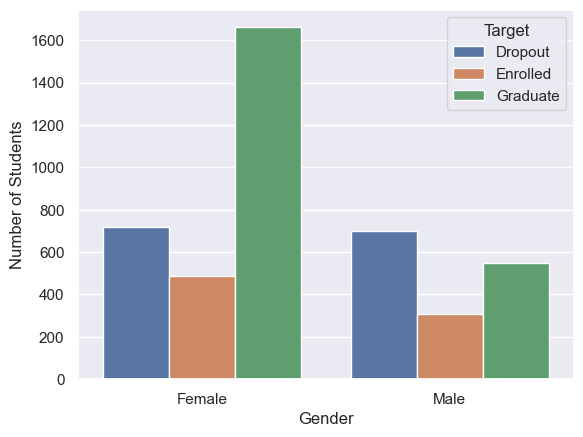

In [10]:
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [11]:
s_df=df.copy()
s_df.shape

(4424, 35)

In [12]:
df.loc[:,'Marital status'].value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

In [13]:
df.loc[:,'Application mode'].value_counts()

1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: Application mode, dtype: int64

In [14]:
df.loc[:,'Application order'].value_counts()

1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application order, dtype: int64

In [15]:
df.loc[:,'Course'].value_counts()

12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: Course, dtype: int64

In [16]:
df.loc[:,'Daytime/evening attendance'].value_counts()

1    3941
0     483
Name: Daytime/evening attendance, dtype: int64

In [17]:
df.loc[:,'Previous qualification'].value_counts()

1     3717
14     219
12     162
3      126
9       45
15      40
16      36
2       23
6       16
7       11
4        8
13       7
17       6
8        4
11       2
5        1
10       1
Name: Previous qualification, dtype: int64

In [18]:
df.loc[:,'Nacionality'].value_counts()

1     4314
14      38
12      14
9       13
3       13
10       5
16       3
4        3
18       3
8        2
17       2
15       2
11       2
2        2
19       2
13       1
5        1
21       1
20       1
6        1
7        1
Name: Nacionality, dtype: int64

In [19]:
df.loc[:,"Mother's qualification"].value_counts()

1     1069
22    1009
13     953
23     562
3      438
19     130
2       83
4       49
10      42
5       21
25       9
7        8
24       8
26       6
6        4
27       4
28       4
17       3
8        3
9        3
21       3
20       3
18       3
11       2
12       1
14       1
16       1
15       1
29       1
Name: Mother's qualification, dtype: int64

In [20]:
df.loc[:,"Father's qualification"].value_counts()

27    1209
14     968
1      904
28     702
3      282
24     112
2       68
4       39
10      38
29      20
5       18
9       10
26       8
7        5
30       5
16       4
21       4
12       4
20       3
25       2
31       2
33       2
8        2
6        2
18       2
17       1
19       1
23       1
34       1
15       1
32       1
13       1
11       1
22       1
Name: Father's qualification, dtype: int64

In [21]:
df.loc[:,'Curricular units 1st sem (credited)'].value_counts()

0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64

In [22]:
df.loc[:,'Curricular units 1st sem (enrolled)'].value_counts()

6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Curricular units 1st sem (enrolled), dtype: int64

In [23]:
df.loc[:,'Curricular units 1st sem (evaluations)'].value_counts()

8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
3       6
24      6
1       6
26      4
25      3
27      2
29      2
45      2
32      1
36      1
31      1
28      1
33      1
Name: Curricular units 1st sem (evaluations), dtype: int64

In [24]:
df.loc[:,'Curricular units 1st sem (approved)'].value_counts()

6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Curricular units 1st sem (approved), dtype: int64

In [25]:
df.loc[:,'Curricular units 1st sem (grade)'].value_counts()

0.000000     718
12.000000    205
13.000000    147
11.000000    138
11.500000     89
            ... 
12.855556      1
13.040000      1
15.657143      1
13.331429      1
14.912500      1
Name: Curricular units 1st sem (grade), Length: 805, dtype: int64

In [26]:
df.loc[:,'Curricular units 1st sem (without evaluations)'].value_counts()

0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Curricular units 1st sem (without evaluations), dtype: int64

In [27]:
df.loc[:,'Curricular units 2nd sem (credited)'].value_counts()


0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
15       2
16       2
18       2
19       1
Name: Curricular units 2nd sem (credited), dtype: int64

In [28]:
df.loc[:,'Curricular units 2nd sem (enrolled)'].value_counts()

6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
19       3
3        3
1        3
15       2
23       2
18       2
16       1
21       1
Name: Curricular units 2nd sem (enrolled), dtype: int64

In [29]:
df.loc[:,'Curricular units 2nd sem (evaluations)'].value_counts()


8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
4      10
21     10
22     10
20      8
2       4
23      4
26      3
24      3
1       3
3       2
27      2
28      1
25      1
33      1
Name: Curricular units 2nd sem (evaluations), dtype: int64

In [30]:
df.loc[:,'Curricular units 2nd sem (approved)'].value_counts()


6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: Curricular units 2nd sem (approved), dtype: int64

In [31]:
df.loc[:,'Curricular units 2nd sem (grade)'].value_counts()


0.000000     870
12.000000    170
11.000000    165
13.000000    150
11.500000     86
            ... 
14.622222      1
13.994444      1
11.685714      1
15.657143      1
11.083333      1
Name: Curricular units 2nd sem (grade), Length: 786, dtype: int64

In [32]:
df.loc[:,'Curricular units 2nd sem (without evaluations)'].value_counts()


0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: Curricular units 2nd sem (without evaluations), dtype: int64

In [33]:
df.loc[:,'Unemployment rate'].value_counts()

7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unemployment rate, dtype: int64

In [34]:
df.loc[:,'Inflation rate'].value_counts()


 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inflation rate, dtype: int64

In [35]:
df.loc[:,'GDP'].value_counts()

 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: GDP, dtype: int64

## Label Encoding

In [36]:
s_df['Target'] = LabelEncoder().fit_transform(s_df['Target'])
s_df.loc[:,'Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

## Identifying Outliers

In [37]:
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(s_df))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Printing the indices of the outliers
outliers

(array([   5,    5,    8, ..., 4420, 4423, 4423], dtype=int64),
 array([17, 30,  6, ..., 18,  6, 18], dtype=int64))

In [38]:
# Dropping the corresponding rows from the dataframe
out_df = s_df.drop(s_df.index[outliers[0]])

# Resetting the index of the dataframe
s_df = out_df.reset_index(drop=True)
s_df.shape
s_df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,1,1,1,8,1,1,1,3,28,4,...,0,5,8,5,11.600000,0,9.4,-0.8,-3.12,2
3533,1,1,1,5,1,1,1,1,1,10,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,2
3534,1,15,1,5,1,14,1,3,28,4,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,2
3535,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0


In [39]:
# Changing the Target to numerical Value 0 or 1. 
#We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df.drop(s_df[s_df["Target"]==1].index, inplace=True)
s_df.loc[:,'Target'].value_counts()

2    1791
0    1116
Name: Target, dtype: int64

In [40]:
# mapping integer codes to new values
mapping = {0: 1, 2: 0}
s_df["Target"] = s_df["Target"].replace(mapping)

s_df.loc[:,'Target'].value_counts()

0    1791
1    1116
Name: Target, dtype: int64

### Distribution of Target Variable

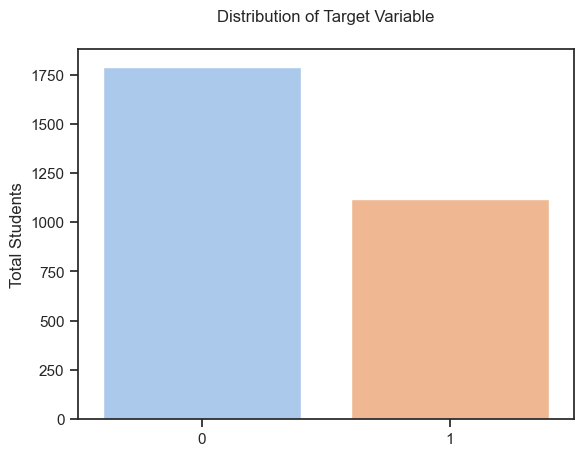

In [41]:
sns.set_style('ticks')
sns.countplot(s_df, x='Target', palette='pastel')

plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Target Variable', pad=20)

plt.show()

## Distribution by Gender

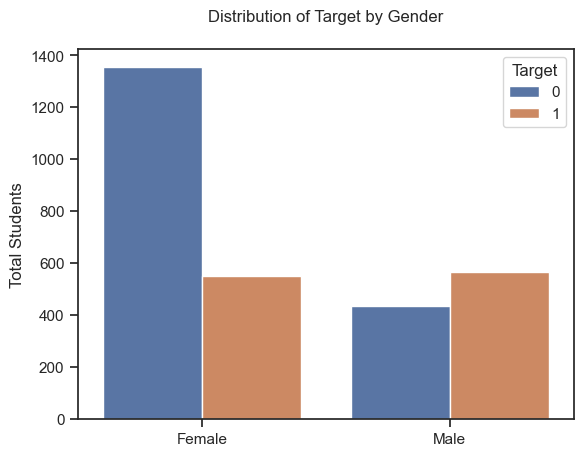

In [42]:
sns.set_style('ticks')
sns.countplot(s_df, x='Gender', hue='Target')

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Target by Gender', pad=20)

plt.show()

According to the data there are many more female graduates than male graduates.
There appears to be a much larger sample of female students than male students.
From this visualization it is easy to see that males are much more likely to
drop out than females.

In [43]:
x = s_df.drop(columns=['Target'], axis=1)
z = s_df["Target"]

## Standardization

In [44]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)


## Split data into training and testing sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled, z, test_size=0.2, random_state=10)


### By Using Logistic regression

In [46]:
#creating logreg object
logreg = LogisticRegression()

In [47]:
# Fit logistic regression model on training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Evaluate performance on testing data
lr_acc = logreg.score(X_test, y_test)
lr_acc

0.9261168384879725

## calculating Accuracy

In [49]:
# Calculating the accuracy of the model
print('Training Accuracy :',logreg.score(X_train,y_train))
print('Testing Accuracy :',lr_acc)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred))

# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)


Training Accuracy : 0.9187096774193548
Testing Accuracy : 0.9261168384879725

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       353
           1       0.96      0.84      0.90       229

    accuracy                           0.93       582
   macro avg       0.94      0.91      0.92       582
weighted avg       0.93      0.93      0.93       582



### By Using Random Forest

In [50]:
#creating rfc object
rfc=RandomForestClassifier(n_estimators = 15)

In [51]:
# Fit Random Forest model on training data
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15)

In [52]:
# Evaluate performance on testing data
rfc_acc = rfc.score(X_test, y_test)
rfc_acc

0.9072164948453608

In [53]:
# Calculating the accuracy of the model
print('Testing Accuracy :',rfc_acc)

# Make predictions on the test data
y_pred_1 = rfc.predict(X_test)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred_1))

# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

Testing Accuracy : 0.9072164948453608

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       353
           1       0.95      0.81      0.87       229

    accuracy                           0.91       582
   macro avg       0.92      0.89      0.90       582
weighted avg       0.91      0.91      0.91       582



### By Using Support Vector Machine

In [54]:
#creating rfc object
svc=SVC()

In [55]:
# Fit Random Forest model on training data
svc.fit(X_train,y_train)

SVC()

In [56]:
# Evaluate performance on testing data
svc_acc = svc.score(X_test, y_test)
svc_acc

0.9175257731958762

In [57]:
# Calculating the accuracy of the model
print('Testing Accuracy :',svc_acc)

# Make predictions on the test data
y_pred_2 = svc.predict(X_test)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred_2))

# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

Testing Accuracy : 0.9175257731958762

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       353
           1       0.97      0.82      0.89       229

    accuracy                           0.92       582
   macro avg       0.93      0.90      0.91       582
weighted avg       0.92      0.92      0.92       582



# Final Result

In [58]:
print(lr_acc)
print(rfc_acc)
print(svc_acc)


0.9261168384879725
0.9072164948453608
0.9175257731958762


The accuracy of Logistic Regression Model is 92.61%

The accuracy of Random Forest Model is 90.72%

The accuracy of SVM Model is 91.75%

<Axes: >

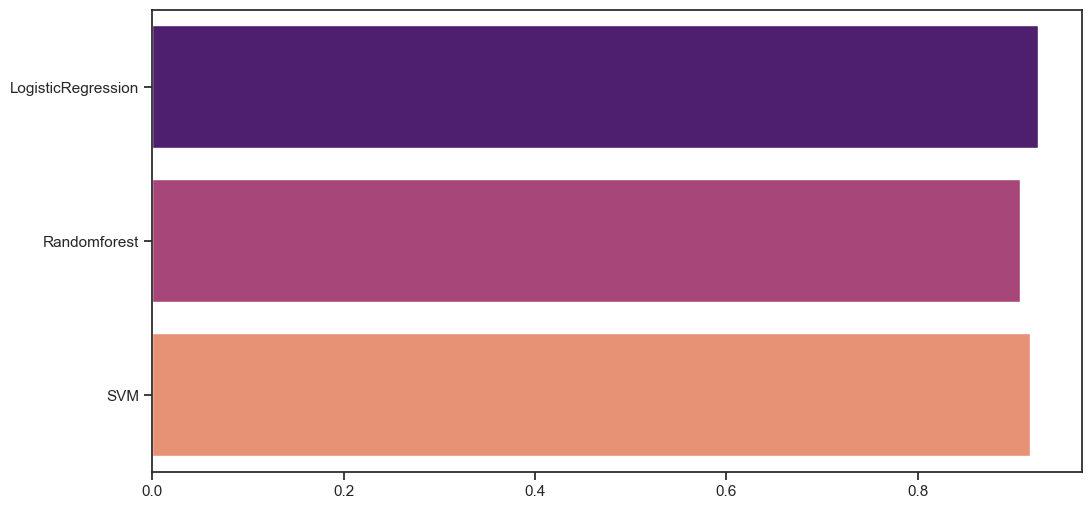

In [59]:
plt.figure(figsize=(12,6))
model_acc = [lr_acc,rfc_acc,svc_acc]
model_name = ['LogisticRegression','Randomforest','SVM']
sns.barplot(x=model_acc, y=model_name,palette='magma')

# Deployment

In [60]:
student1 = [1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571428571429,0,0,6,10,5,12.4,0,9.4,-0.8,-3.12]
student1_sc = scaler.transform(np.array([student1])) 
student1_sc

array([[-0.29518702,  0.31562136,  0.28687896,  1.17365242,  0.31867479,
        -0.3456238 ,  0.        ,  1.19549826,  0.95463952, -0.31172354,
        -1.18169428,  0.85340474,  0.        , -0.34299717,  0.37892971,
        -0.72469554, -0.62735654, -0.35868052,  0.        , -0.25863744,
         0.05769599,  0.16132012,  0.60265033,  0.57080087, -0.20017881,
        -0.23925286,  0.01400277,  0.7764423 ,  0.26436426,  0.43048234,
        -0.16747487, -0.84852572, -1.44971338, -1.40219979]])

In [61]:
pred= logreg.predict(student1_sc)
pred

array([0])

In [62]:
if pred[0] == 0:
  print('Student has Graduate')
else:
  print('Student has Dropout')

Student has Graduate


# Conclusion


Based on the results of this analysis, the logistic regression model produces the best overall fit metrics and is the optimal supervised machine learning model to accurately predict student dropouts in this sample population. The logistic regression model accurately predicts 90% of student dropouts and can be used to target communications and allocate resources to help prevent students at risk from dropping out. It is important to note that this dataset is limited to a single university and only two semesters' worth of data, and the results may not generalize to other institutions. In addition, the lower recall scores on all three models suggest that additional features, including student income factors, housing status (on or off campus), grade point average, employment status, and even faculty data, could be added to help improve the accuracy and reliability of the results to produce fewer false negative results.



# Thank You.....😊